# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city + "&appid=" + weather_api_key + "&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dursunbey
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | chui
Processing Record 4 of Set 1 | namalenga
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | copiapo
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | selfoss
Processing Record 9 of Set 1 | ixtapa
Processing Record 10 of Set 1 | kapa'a
Processing Record 11 of Set 1 | lebu
Processing Record 12 of Set 1 | sitka
Processing Record 13 of Set 1 | jiazi
Processing Record 14 of Set 1 | rawson
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | binyamina-giv'at ada
City not found. Skipping...
Processing Record 17 of Set 1 | lihue
Processing Record 18 of Set 1 | dzuunharaa
Processing Record 19 of Set 1 | port isabel
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of 

Processing Record 40 of Set 4 | kyren
Processing Record 41 of Set 4 | ishim
Processing Record 42 of Set 4 | san antonio de pale
Processing Record 43 of Set 4 | saint croix
Processing Record 44 of Set 4 | petropavlovsk-kamchatsky
Processing Record 45 of Set 4 | eirunepe
Processing Record 46 of Set 4 | haimen
Processing Record 47 of Set 4 | haiku-pauwela
Processing Record 48 of Set 4 | likiep
Processing Record 49 of Set 4 | whyalla stuart
City not found. Skipping...
Processing Record 0 of Set 5 | quelimane
Processing Record 1 of Set 5 | gebeit
Processing Record 2 of Set 5 | balykshi
Processing Record 3 of Set 5 | vadso
Processing Record 4 of Set 5 | talnakh
Processing Record 5 of Set 5 | karasburg
Processing Record 6 of Set 5 | bafra
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | keflavik
Processing Record 9 of Set 5 | devinuwara
City not found. Skipping...
Processing Record 10 of Set 5 | nuuk
Processing Record 11 of Set 5 | kabwe
Processing Record 12 of Set 5 

Processing Record 31 of Set 8 | sumbawanga
Processing Record 32 of Set 8 | dunedin
Processing Record 33 of Set 8 | orcopampa
Processing Record 34 of Set 8 | alesund
Processing Record 35 of Set 8 | veydelevka
Processing Record 36 of Set 8 | mawu
Processing Record 37 of Set 8 | bintulu
Processing Record 38 of Set 8 | manicore
Processing Record 39 of Set 8 | kurmuk
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | fabbrico
Processing Record 42 of Set 8 | sur
Processing Record 43 of Set 8 | pimentel
Processing Record 44 of Set 8 | cadale
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | pinarbasi
Processing Record 47 of Set 8 | kuusamo
Processing Record 48 of Set 8 | farshut
Processing Record 49 of Set 8 | galliano
Processing Record 0 of Set 9 | buriti bravo
Processing Record 1 of Set 9 | sao caetano de odivelas
Processing Record 2 of Set 9 | carutapera
Processing Record 3 of Set 9 | ringim
Processing Record 4 of Set 9 | aljezur
Processing Reco

Processing Record 23 of Set 12 | charters towers
Processing Record 24 of Set 12 | kiunga
Processing Record 25 of Set 12 | sept-iles
Processing Record 26 of Set 12 | suva
Processing Record 27 of Set 12 | gudauta
Processing Record 28 of Set 12 | sanya
Processing Record 29 of Set 12 | vuktyl
Processing Record 30 of Set 12 | bogen
Processing Record 31 of Set 12 | mugia
Processing Record 32 of Set 12 | taghazout
Processing Record 33 of Set 12 | san rafael
Processing Record 34 of Set 12 | wellington
Processing Record 35 of Set 12 | portland
Processing Record 36 of Set 12 | nuriootpa
Processing Record 37 of Set 12 | umm kaddadah
Processing Record 38 of Set 12 | keren
Processing Record 39 of Set 12 | petrolina
Processing Record 40 of Set 12 | nar'yan-mar
Processing Record 41 of Set 12 | tobi village
City not found. Skipping...
Processing Record 42 of Set 12 | howard springs
Processing Record 43 of Set 12 | formosa
Processing Record 44 of Set 12 | al mutayrifi
Processing Record 45 of Set 12 | c

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df["City"]=city_data_df["City"].str.title()

#Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [7]:
#Capitilizing city names 
city_data_df["City"]=city_data_df["City"].str.title()

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavaratti,10.5669,72.6420,81.90,71,78,5.57,IN,1697410382
1,Longyearbyen,78.2186,15.6401,31.84,59,75,17.27,SJ,1697410290
2,Edinburgh Of The Seven Seas,-37.0676,-12.3116,53.62,76,83,27.65,SH,1697410382
3,Kidal,18.4411,1.4078,85.62,13,43,2.53,ML,1697410383
4,Karbala,32.6160,44.0249,78.17,35,1,10.67,IQ,1697410383
5,Bodaybo,57.8506,114.1933,34.43,84,100,3.00,RU,1697410179
6,Hafar Al-Batin,28.4328,45.9708,81.18,26,0,6.91,SA,1697410383
7,College,64.8569,-147.8028,38.44,89,75,5.75,US,1697410384
8,Harper,4.3750,-7.7169,76.80,90,100,8.30,LR,1697410384
9,Gustavia,17.8962,-62.8498,83.79,76,26,4.00,BL,1697410384


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")
city_data_df = city_data_df.rename(columns={"Lat":"Latitude", "Lng":"Longitude", "Max Temp":"Max Temp (F)"})
# Display sample data
city_data_df.head()


,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Dursunbey,39.5860,28.6257,53.33,81,93,2.35,TR,1697564791
1,Blackmans Bay,-43.0167,147.3167,45.52,86,48,1.01,AU,1697564493
2,Chui,-33.6971,-53.4616,61.27,54,71,18.21,UY,1697564793
3,Namalenga,-10.9500,39.1000,77.09,72,86,10.13,TZ,1697564793
4,Bredasdorp,-34.5322,20.0403,62.44,83,0,3.89,ZA,1697564794


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

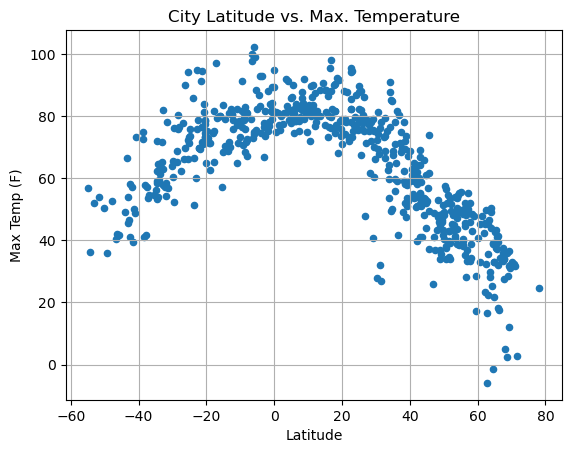

In [8]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot(kind="scatter", x="Latitude", y="Max Temp (F)", grid=True, title="City Latitude vs. Max. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

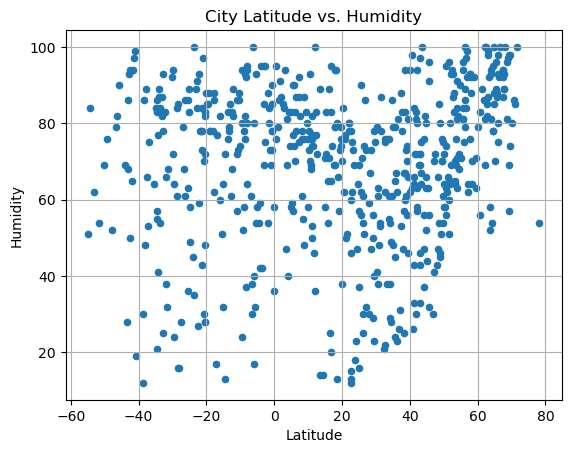

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, title="City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

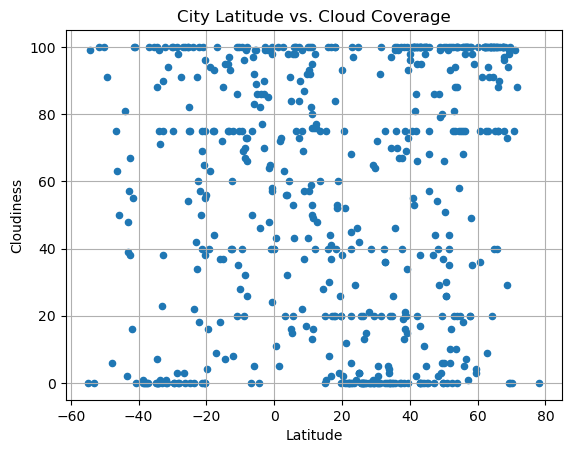

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, title="City Latitude vs. Cloud Coverage")



# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

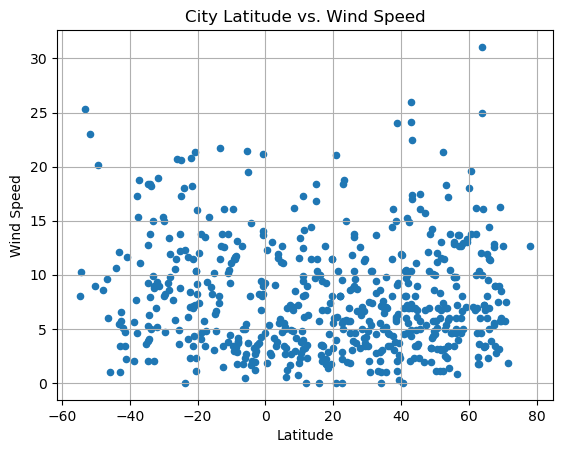

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, title="City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
x_val = city_data_df["Latitude"]
y_val = city_data_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Latitude"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Dursunbey,39.5860,28.6257,53.33,81,93,2.35,TR,1697564791
6,Selfoss,63.9331,-20.9971,49.05,94,100,24.96,IS,1697564795
7,Ixtapa,20.7000,-105.2000,88.23,62,75,4.00,MX,1697564796
8,Kapa'A,22.0752,-159.3190,73.38,80,0,8.05,US,1697564796
10,Sitka,57.0531,-135.3300,55.29,62,100,12.66,US,1697564797


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Latitude"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Latitude,Longitude,Max Temp (F),Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Blackmans Bay,-43.0167,147.3167,45.52,86,48,1.01,AU,1697564493
2,Chui,-33.6971,-53.4616,61.27,54,71,18.21,UY,1697564793
3,Namalenga,-10.9500,39.1000,77.09,72,86,10.13,TZ,1697564793
4,Bredasdorp,-34.5322,20.0403,62.44,83,0,3.89,ZA,1697564794
5,Copiapo,-27.3667,-70.3333,62.29,28,91,7.65,CL,1697564794


###  Temperature vs. Latitude Linear Regression Plot

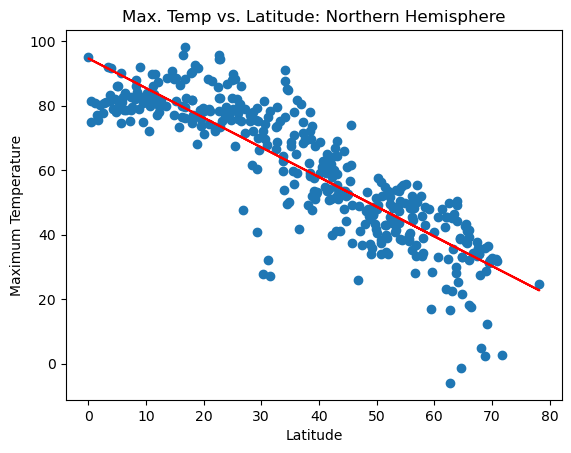

In [18]:
# Linear regression on Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Max Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Max. Temp vs. Latitude: Northern Hemisphere")
plt.show()

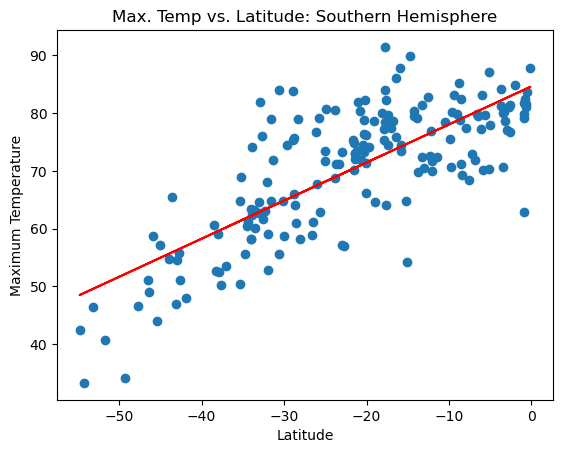

In [17]:
# Linear regression on Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Max Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (-30,280))
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.title("Max. Temp vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** In the two above scatterplot graphs showing Latitude vs. maximum temperature, we can see that there is a clear linear relationship in both the Northern Hemisphere and the Southern Hemisphere.  In the north, maximum temperature is directly, negatively correlated to latitude.  That is, the higher the latitude (the further north), the lower the maximum temperature will be.  We see this exact correlation mirrored in the Southern Hemisphere, where maximum temperature is positively correlated to latitude: the further south you go (lower latitudes), the lower the maximum temperature will be.  Of all the linear relationships depicted, this one has the strongest correlation.  

### Humidity vs. Latitude Linear Regression Plot

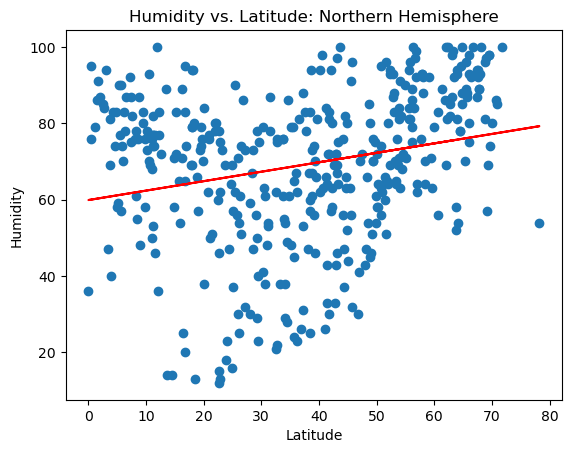

In [19]:
# Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude: Northern Hemisphere")
plt.show()

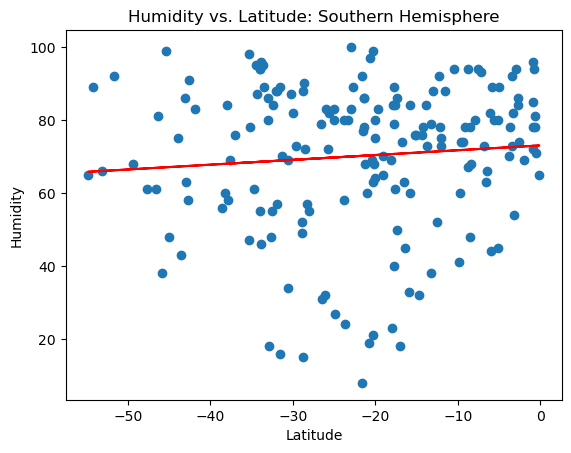

In [21]:
# Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** There is almost no correlation between humidity and latitude in either the Southern or the Northern Hemisphere.  We do see an overall higher rate of humidity in the Northern Hemispehre than the Southern Hemisphere, but from the above graphs we can see that humidity can occur in any latitude, and does not directly, strongly correlate to the latitude of that location.  

### Cloudiness vs. Latitude Linear Regression Plot

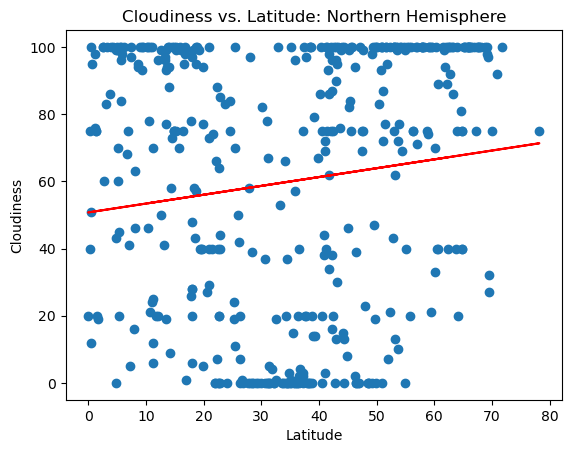

In [22]:
# Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude: Northern Hemisphere")
plt.show()

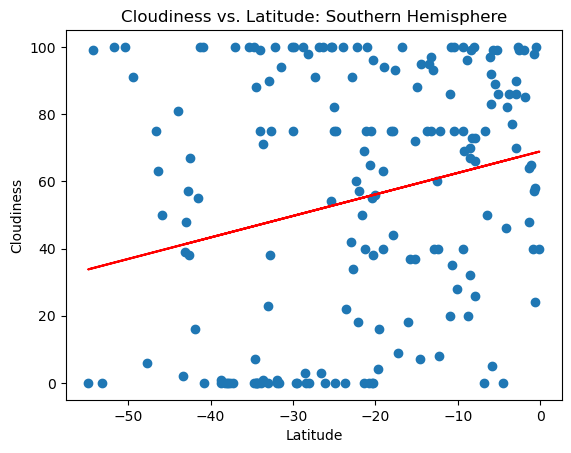

In [20]:
# Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

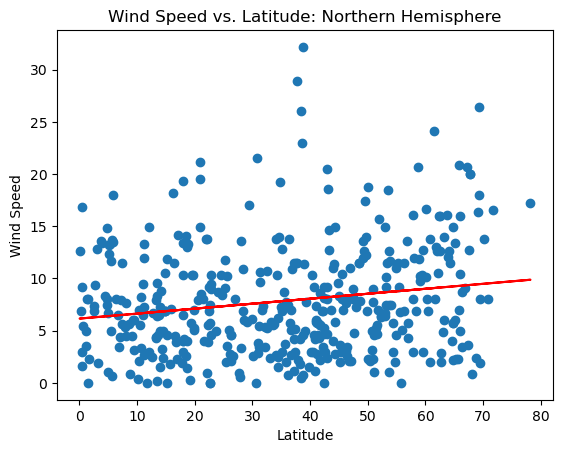

In [23]:
# Northern Hemisphere
x_val = northern_hemi_df["Latitude"]
y_val = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude: Northern Hemisphere")
plt.show()

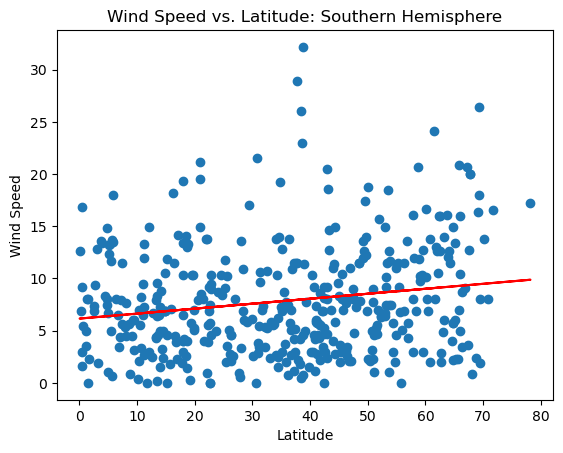

In [24]:
# Southern Hemisphere
x_val = southern_hemi_df["Latitude"]
y_val = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr)=linregress(x_val, y_val)

regress_values = x_val * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val, regress_values, "r-")
plt.annotate(line_eq, (40,300))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed vs. Latitude: Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE